In [36]:
import pandas as pd
import seaborn as sns

In [37]:
df = pd.read_csv("MainData_updated.csv")
print(df.head(2))

       Enlem     Boylam      İlçe    Tür  Modern Değeri  Traditional Değeri  \
0  40.995444  29.024803   KADIKÖY  HOTEL              5                   0   
1  40.980917  29.101372  ATAŞEHİR  HOTEL              5                   0   

   Hotel Değeri  Ortalama Harcama Tutarı                Restoran Çeşidi  \
0             2                    750.0                       Business   
1             1                   2000.0  Banket, Event, Etkinlik Oteli   

   Map Profile Score  Map Population Score Mapin Segment  
0                NaN                   NaN            H2  
1                NaN                   NaN            H1  


In [38]:
df

,Enlem,Boylam,İlçe,Tür,Modern Değeri,Traditional Değeri,Hotel Değeri,Ortalama Harcama Tutarı,Restoran Çeşidi,Map Profile Score,Map Population Score,Mapin Segment
0,40.995444,29.024803,KADIKÖY,HOTEL,5,0,2,750.0,Business,NaN,NaN,H2
1,40.980917,29.101372,ATAŞEHİR,HOTEL,5,0,1,2000.0,"Banket, Event, Etkinlik Oteli",NaN,NaN,H1
2,41.054086,29.051875,ÜSKÜDAR,HOTEL,5,0,1,750.0,"Diğer (Apart, Pansiyon)",NaN,NaN,H1
3,41.019103,28.957953,ÜSKÜDAR,MODERN,4,0,0,750.0,Tekne-Event Hall-Catering,67.1815,54.2895,D4-C
4,40.965051,29.072068,KADIKÖY,MODERN,3,0,0,750.0,Modern Pub & Bistro,77.7405,62.0554,D3-B
...,...,...,...,...,...,...,...,...,...,...,...,...
781,40.976207,29.047311,KADIKÖY,TRADITIONAL,0,0,0,2000.0,Geleneksel Meyhane,73.4570,66.8130,R3-B
782,40.986261,29.033062,KADIKÖY,MODERN,0,0,0,1500.0,"Dg.Mdrn(Tekne,S.Ev,S.house,Ct)",73.3350,64.1790,D3-B
783,40.940802,29.111243,KADIKÖY,TRADITIONAL,0,0,0,2000.0,Kebap,NaN,NaN,R2-B
784,41.002037,29.154804,ATAŞEHİR,TRADITIONAL,0,0,0,1500.0,Kebap,NaN,NaN,R3-B


In [39]:
df.to_csv("MainData_update.csv", index=False)

In [40]:
from sklearn.preprocessing import OneHotEncoder

# One Hot Encoding ilçe
encoder = OneHotEncoder(sparse_output=False)
ilceler = encoder.fit_transform(df[["İlçe"]])
print(ilceler)
print(f"İlçeler: {encoder.categories_}")

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
İlçeler: [array(['ATAŞEHİR', 'KADIKÖY', 'ÜMRANİYE', 'ÜSKÜDAR'], dtype=object)]


In [41]:
# ilceler numpy array ise
ilceler_df = pd.DataFrame(ilceler, columns=encoder.get_feature_names_out(["İlçe"]))

# Ardından concat et
df = pd.concat([df.reset_index(drop=True), ilceler_df.reset_index(drop=True)], axis=1)

df = df.drop(["İlçe"], axis=1)
df

,Enlem,Boylam,Tür,Modern Değeri,Traditional Değeri,Hotel Değeri,Ortalama Harcama Tutarı,Restoran Çeşidi,Map Profile Score,Map Population Score,Mapin Segment,İlçe_ATAŞEHİR,İlçe_KADIKÖY,İlçe_ÜMRANİYE,İlçe_ÜSKÜDAR
0,40.995444,29.024803,HOTEL,5,0,2,750.0,Business,NaN,NaN,H2,0.0,1.0,0.0,0.0
1,40.980917,29.101372,HOTEL,5,0,1,2000.0,"Banket, Event, Etkinlik Oteli",NaN,NaN,H1,1.0,0.0,0.0,0.0
2,41.054086,29.051875,HOTEL,5,0,1,750.0,"Diğer (Apart, Pansiyon)",NaN,NaN,H1,0.0,0.0,0.0,1.0
3,41.019103,28.957953,MODERN,4,0,0,750.0,Tekne-Event Hall-Catering,67.1815,54.2895,D4-C,0.0,0.0,0.0,1.0
4,40.965051,29.072068,MODERN,3,0,0,750.0,Modern Pub & Bistro,77.7405,62.0554,D3-B,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,40.976207,29.047311,TRADITIONAL,0,0,0,2000.0,Geleneksel Meyhane,73.4570,66.8130,R3-B,0.0,1.0,0.0,0.0
782,40.986261,29.033062,MODERN,0,0,0,1500.0,"Dg.Mdrn(Tekne,S.Ev,S.house,Ct)",73.3350,64.1790,D3-B,0.0,1.0,0.0,0.0
783,40.940802,29.111243,TRADITIONAL,0,0,0,2000.0,Kebap,NaN,NaN,R2-B,0.0,1.0,0.0,0.0
784,41.002037,29.154804,TRADITIONAL,0,0,0,1500.0,Kebap,NaN,NaN,R3-B,1.0,0.0,0.0,0.0


In [42]:
# One Hot Encoding tür
encoder = OneHotEncoder(sparse_output=False)
tur = encoder.fit_transform(df[["Tür"]])
print(tur)
print(f"Sınıflar: {encoder.categories_}")

# numpy array ise
tur_df = pd.DataFrame(tur, columns=encoder.get_feature_names_out(["Tür"]))

# Ardından concat et
df = pd.concat([df.reset_index(drop=True), tur_df.reset_index(drop=True)], axis=1)

df = df.drop(["Tür"], axis=1)
df

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
Sınıflar: [array(['HOTEL', 'MODERN', 'TRADITIONAL'], dtype=object)]


,Enlem,Boylam,Modern Değeri,Traditional Değeri,Hotel Değeri,Ortalama Harcama Tutarı,Restoran Çeşidi,Map Profile Score,Map Population Score,Mapin Segment,İlçe_ATAŞEHİR,İlçe_KADIKÖY,İlçe_ÜMRANİYE,İlçe_ÜSKÜDAR,Tür_HOTEL,Tür_MODERN,Tür_TRADITIONAL
0,40.995444,29.024803,5,0,2,750.0,Business,NaN,NaN,H2,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,40.980917,29.101372,5,0,1,2000.0,"Banket, Event, Etkinlik Oteli",NaN,NaN,H1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,41.054086,29.051875,5,0,1,750.0,"Diğer (Apart, Pansiyon)",NaN,NaN,H1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,41.019103,28.957953,4,0,0,750.0,Tekne-Event Hall-Catering,67.1815,54.2895,D4-C,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,40.965051,29.072068,3,0,0,750.0,Modern Pub & Bistro,77.7405,62.0554,D3-B,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,40.976207,29.047311,0,0,0,2000.0,Geleneksel Meyhane,73.4570,66.8130,R3-B,0.0,1.0,0.0,0.0,0.0,0.0,1.0
782,40.986261,29.033062,0,0,0,1500.0,"Dg.Mdrn(Tekne,S.Ev,S.house,Ct)",73.3350,64.1790,D3-B,0.0,1.0,0.0,0.0,0.0,1.0,0.0
783,40.940802,29.111243,0,0,0,2000.0,Kebap,NaN,NaN,R2-B,0.0,1.0,0.0,0.0,0.0,0.0,1.0
784,41.002037,29.154804,0,0,0,1500.0,Kebap,NaN,NaN,R3-B,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
import numpy as np

def ortalama_harcama_to_num(x):
    if pd.isna(x):
        return np.nan
    
    x = str(x)  # önce string yap
    
    x = x.replace(' TL', '').replace('.', '')
    
    if '-' in x:
        alt, ust = x.split('-')
        alt = int(alt)
        ust = int(ust)
        return round((alt + ust) / 2)
    elif '+' in x:
        sayi = int(x.replace('+', ''))
        return sayi
    else:
        return int(x)

df["Ortalama Harcama Tutarı"] = df["Ortalama Harcama Tutarı"].apply(ortalama_harcama_to_num)

In [44]:
print(df["Ortalama Harcama Tutarı"].head(10))

0     7500.0
1    20000.0
2     7500.0
3     7500.0
4     7500.0
5     7500.0
6     7500.0
7        NaN
8        NaN
9        NaN
Name: Ortalama Harcama Tutarı, dtype: float64


In [45]:
df["Ortalama Harcama Tutarı"] = df["Ortalama Harcama Tutarı"].apply(ortalama_harcama_to_num)
print(df["Ortalama Harcama Tutarı"].head(10))

0     75000.0
1    200000.0
2     75000.0
3     75000.0
4     75000.0
5     75000.0
6     75000.0
7         NaN
8         NaN
9         NaN
Name: Ortalama Harcama Tutarı, dtype: float64


In [46]:
df

,Enlem,Boylam,Modern Değeri,Traditional Değeri,Hotel Değeri,Ortalama Harcama Tutarı,Restoran Çeşidi,Map Profile Score,Map Population Score,Mapin Segment,İlçe_ATAŞEHİR,İlçe_KADIKÖY,İlçe_ÜMRANİYE,İlçe_ÜSKÜDAR,Tür_HOTEL,Tür_MODERN,Tür_TRADITIONAL
0,40.995444,29.024803,5,0,2,75000.0,Business,NaN,NaN,H2,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,40.980917,29.101372,5,0,1,200000.0,"Banket, Event, Etkinlik Oteli",NaN,NaN,H1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,41.054086,29.051875,5,0,1,75000.0,"Diğer (Apart, Pansiyon)",NaN,NaN,H1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,41.019103,28.957953,4,0,0,75000.0,Tekne-Event Hall-Catering,67.1815,54.2895,D4-C,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,40.965051,29.072068,3,0,0,75000.0,Modern Pub & Bistro,77.7405,62.0554,D3-B,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,40.976207,29.047311,0,0,0,200000.0,Geleneksel Meyhane,73.4570,66.8130,R3-B,0.0,1.0,0.0,0.0,0.0,0.0,1.0
782,40.986261,29.033062,0,0,0,150000.0,"Dg.Mdrn(Tekne,S.Ev,S.house,Ct)",73.3350,64.1790,D3-B,0.0,1.0,0.0,0.0,0.0,1.0,0.0
783,40.940802,29.111243,0,0,0,200000.0,Kebap,NaN,NaN,R2-B,0.0,1.0,0.0,0.0,0.0,0.0,1.0
784,41.002037,29.154804,0,0,0,150000.0,Kebap,NaN,NaN,R3-B,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
# One Hot Encoding tür
encoder = OneHotEncoder(sparse_output=False)
restoran = encoder.fit_transform(df[["Restoran Çeşidi"]])
print(restoran)
print(f"Değerler: {encoder.categories_}")

# numpy array ise
resotran_df = pd.DataFrame(restoran, columns=encoder.get_feature_names_out(["Restoran Çeşidi"]))

# Ardından concat et
df = pd.concat([df.reset_index(drop=True), resotran_df.reset_index(drop=True)], axis=1)

df = df.drop(["Restoran Çeşidi"], axis=1)
df

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Değerler: [array(['Askeri Birlik-Sosyal Tesis', 'Balık',
       'Banket, Event, Etkinlik Oteli', 'Business', 'Butik Otel',
       'Dg.Mdrn(Tekne,S.Ev,S.house,Ct)', 'Dg.Tra(Pav,A.Bir,Sos.T)',
       'Dg.Tra(Pav,Birah, A.Bir,Sos.T)', 'Diger (Apart, Pansiyon)',
       'Diğer (Apart, Pansiyon)', 'Diğer Bistro Cafe', 'Dünya Mutfağı',
       'Fine Dining (D.Mutf-Sar.Evi)', 'Fine Dining (D.Mutf-Şar.Evi)',
       'Gece Kulübü', 'Gece Kulübü & Etkinlik', 'Geleneksel Birahane',
       'Geleneksel Meyhane', 'Kebap', 'Kokteyl Bar', 'Lüks Butik Otel',
       'Modern Pub & Bistro', 'Pavyon', 'Premium Bistro Cafe',
       'Pub & Bistro & Kokteyl Bar', 'Tekne-Event Hall-Catering',
       'Uzak Doğu Mutfağı', 'Yeni Nesil Meyhane'], dtype=object)]


,Enlem,Boylam,Modern Değeri,Traditional Değeri,Hotel Değeri,Ortalama Harcama Tutarı,Map Profile Score,Map Population Score,Mapin Segment,İlçe_ATAŞEHİR,...,Restoran Çeşidi_Kebap,Restoran Çeşidi_Kokteyl Bar,Restoran Çeşidi_Lüks Butik Otel,Restoran Çeşidi_Modern Pub & Bistro,Restoran Çeşidi_Pavyon,Restoran Çeşidi_Premium Bistro Cafe,Restoran Çeşidi_Pub & Bistro & Kokteyl Bar,Restoran Çeşidi_Tekne-Event Hall-Catering,Restoran Çeşidi_Uzak Doğu Mutfağı,Restoran Çeşidi_Yeni Nesil Meyhane
0,40.995444,29.024803,5,0,2,75000.0,NaN,NaN,H2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40.980917,29.101372,5,0,1,200000.0,NaN,NaN,H1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41.054086,29.051875,5,0,1,75000.0,NaN,NaN,H1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41.019103,28.957953,4,0,0,75000.0,67.1815,54.2895,D4-C,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,40.965051,29.072068,3,0,0,75000.0,77.7405,62.0554,D3-B,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,40.976207,29.047311,0,0,0,200000.0,73.4570,66.8130,R3-B,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,40.986261,29.033062,0,0,0,150000.0,73.3350,64.1790,D3-B,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,40.940802,29.111243,0,0,0,200000.0,NaN,NaN,R2-B,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,41.002037,29.154804,0,0,0,150000.0,NaN,NaN,R3-B,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df["Mapin Segment"] = df["Mapin Segment"].apply(lambda x: x.split("-")[1] if "-" in x else np.nan)

In [49]:
df

,Enlem,Boylam,Modern Değeri,Traditional Değeri,Hotel Değeri,Ortalama Harcama Tutarı,Map Profile Score,Map Population Score,Mapin Segment,İlçe_ATAŞEHİR,...,Restoran Çeşidi_Kebap,Restoran Çeşidi_Kokteyl Bar,Restoran Çeşidi_Lüks Butik Otel,Restoran Çeşidi_Modern Pub & Bistro,Restoran Çeşidi_Pavyon,Restoran Çeşidi_Premium Bistro Cafe,Restoran Çeşidi_Pub & Bistro & Kokteyl Bar,Restoran Çeşidi_Tekne-Event Hall-Catering,Restoran Çeşidi_Uzak Doğu Mutfağı,Restoran Çeşidi_Yeni Nesil Meyhane
0,40.995444,29.024803,5,0,2,75000.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40.980917,29.101372,5,0,1,200000.0,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41.054086,29.051875,5,0,1,75000.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41.019103,28.957953,4,0,0,75000.0,67.1815,54.2895,C,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,40.965051,29.072068,3,0,0,75000.0,77.7405,62.0554,B,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,40.976207,29.047311,0,0,0,200000.0,73.4570,66.8130,B,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,40.986261,29.033062,0,0,0,150000.0,73.3350,64.1790,B,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,40.940802,29.111243,0,0,0,200000.0,NaN,NaN,B,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,41.002037,29.154804,0,0,0,150000.0,NaN,NaN,B,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
from sklearn.preprocessing import OrdinalEncoder

# NaN olanları silmek veya doldurmak isteyebilirsin, modeline göre karar ver
# df_dropna = df.dropna(subset=["Segment_Son"]).copy()

# Ordinal Encoder, hiyerarşi D < C < B < A için
encoder = OrdinalEncoder(categories=[['D', 'C', 'B', 'A', np.nan]])

# Encode et
df["Mapin Segment"] = encoder.fit_transform(df[["Mapin Segment"]])

In [51]:
encoder.categories_

[array(['D', 'C', 'B', 'A', nan], dtype=object)]

In [52]:
df

,Enlem,Boylam,Modern Değeri,Traditional Değeri,Hotel Değeri,Ortalama Harcama Tutarı,Map Profile Score,Map Population Score,Mapin Segment,İlçe_ATAŞEHİR,...,Restoran Çeşidi_Kebap,Restoran Çeşidi_Kokteyl Bar,Restoran Çeşidi_Lüks Butik Otel,Restoran Çeşidi_Modern Pub & Bistro,Restoran Çeşidi_Pavyon,Restoran Çeşidi_Premium Bistro Cafe,Restoran Çeşidi_Pub & Bistro & Kokteyl Bar,Restoran Çeşidi_Tekne-Event Hall-Catering,Restoran Çeşidi_Uzak Doğu Mutfağı,Restoran Çeşidi_Yeni Nesil Meyhane
0,40.995444,29.024803,5,0,2,75000.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40.980917,29.101372,5,0,1,200000.0,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41.054086,29.051875,5,0,1,75000.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41.019103,28.957953,4,0,0,75000.0,67.1815,54.2895,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,40.965051,29.072068,3,0,0,75000.0,77.7405,62.0554,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,40.976207,29.047311,0,0,0,200000.0,73.4570,66.8130,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,40.986261,29.033062,0,0,0,150000.0,73.3350,64.1790,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,40.940802,29.111243,0,0,0,200000.0,NaN,NaN,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,41.002037,29.154804,0,0,0,150000.0,NaN,NaN,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df['Modern Değeri'] = df['Modern Değeri'].fillna(0)
df['Traditional Değeri'] = df['Traditional Değeri'].fillna(0)
df['Hotel Değeri'] = df['Hotel Değeri'].fillna(0)

In [54]:
df

,Enlem,Boylam,Modern Değeri,Traditional Değeri,Hotel Değeri,Ortalama Harcama Tutarı,Map Profile Score,Map Population Score,Mapin Segment,İlçe_ATAŞEHİR,...,Restoran Çeşidi_Kebap,Restoran Çeşidi_Kokteyl Bar,Restoran Çeşidi_Lüks Butik Otel,Restoran Çeşidi_Modern Pub & Bistro,Restoran Çeşidi_Pavyon,Restoran Çeşidi_Premium Bistro Cafe,Restoran Çeşidi_Pub & Bistro & Kokteyl Bar,Restoran Çeşidi_Tekne-Event Hall-Catering,Restoran Çeşidi_Uzak Doğu Mutfağı,Restoran Çeşidi_Yeni Nesil Meyhane
0,40.995444,29.024803,5,0,2,75000.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40.980917,29.101372,5,0,1,200000.0,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41.054086,29.051875,5,0,1,75000.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41.019103,28.957953,4,0,0,75000.0,67.1815,54.2895,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,40.965051,29.072068,3,0,0,75000.0,77.7405,62.0554,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,40.976207,29.047311,0,0,0,200000.0,73.4570,66.8130,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,40.986261,29.033062,0,0,0,150000.0,73.3350,64.1790,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,40.940802,29.111243,0,0,0,200000.0,NaN,NaN,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,41.002037,29.154804,0,0,0,150000.0,NaN,NaN,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
"""
"Modern Değeri", "Traditional Değeri", "Hotel Değeri" sütunları var. Üçü de 0 olursa, "Mapin Segment" sütununun değerini 0.0 yapalım, "Map Population Score"
değerini 0.0 yapalım, "Map Profile Score" sütununun değerini 0.0 yapalım.
"""

condition = (
    (df["Modern Değeri"] == 0) &
    (df["Traditional Değeri"] == 0) &
    (df["Hotel Değeri"] == 0)
)

df.loc[condition, ["Mapin Segment", "Map Population Score", "Map Profile Score"]] = 0.0
df

,Enlem,Boylam,Modern Değeri,Traditional Değeri,Hotel Değeri,Ortalama Harcama Tutarı,Map Profile Score,Map Population Score,Mapin Segment,İlçe_ATAŞEHİR,...,Restoran Çeşidi_Kebap,Restoran Çeşidi_Kokteyl Bar,Restoran Çeşidi_Lüks Butik Otel,Restoran Çeşidi_Modern Pub & Bistro,Restoran Çeşidi_Pavyon,Restoran Çeşidi_Premium Bistro Cafe,Restoran Çeşidi_Pub & Bistro & Kokteyl Bar,Restoran Çeşidi_Tekne-Event Hall-Catering,Restoran Çeşidi_Uzak Doğu Mutfağı,Restoran Çeşidi_Yeni Nesil Meyhane
0,40.995444,29.024803,5,0,2,75000.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40.980917,29.101372,5,0,1,200000.0,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41.054086,29.051875,5,0,1,75000.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41.019103,28.957953,4,0,0,75000.0,67.1815,54.2895,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,40.965051,29.072068,3,0,0,75000.0,77.7405,62.0554,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,40.976207,29.047311,0,0,0,200000.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,40.986261,29.033062,0,0,0,150000.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,40.940802,29.111243,0,0,0,200000.0,0.0000,0.0000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,41.002037,29.154804,0,0,0,150000.0,0.0000,0.0000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df["Map Profile Score"] = df["Map Profile Score"].astype(str).str.replace(",", ".", regex=False)
df["Map Population Score"] = df["Map Population Score"].astype(str).str.replace(",", ".", regex=False)

In [57]:
df = df.astype(float)

In [58]:
df

,Enlem,Boylam,Modern Değeri,Traditional Değeri,Hotel Değeri,Ortalama Harcama Tutarı,Map Profile Score,Map Population Score,Mapin Segment,İlçe_ATAŞEHİR,...,Restoran Çeşidi_Kebap,Restoran Çeşidi_Kokteyl Bar,Restoran Çeşidi_Lüks Butik Otel,Restoran Çeşidi_Modern Pub & Bistro,Restoran Çeşidi_Pavyon,Restoran Çeşidi_Premium Bistro Cafe,Restoran Çeşidi_Pub & Bistro & Kokteyl Bar,Restoran Çeşidi_Tekne-Event Hall-Catering,Restoran Çeşidi_Uzak Doğu Mutfağı,Restoran Çeşidi_Yeni Nesil Meyhane
0,40.995444,29.024803,5.0,0.0,2.0,75000.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40.980917,29.101372,5.0,0.0,1.0,200000.0,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41.054086,29.051875,5.0,0.0,1.0,75000.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41.019103,28.957953,4.0,0.0,0.0,75000.0,67.1815,54.2895,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,40.965051,29.072068,3.0,0.0,0.0,75000.0,77.7405,62.0554,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,40.976207,29.047311,0.0,0.0,0.0,200000.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,40.986261,29.033062,0.0,0.0,0.0,150000.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,40.940802,29.111243,0.0,0.0,0.0,200000.0,0.0000,0.0000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,41.002037,29.154804,0.0,0.0,0.0,150000.0,0.0000,0.0000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
print(df.dtypes)


Enlem                                             float64
Boylam                                            float64
Modern Değeri                                     float64
Traditional Değeri                                float64
Hotel Değeri                                      float64
Ortalama Harcama Tutarı                           float64
Map Profile Score                                 float64
Map Population Score                              float64
Mapin Segment                                     float64
İlçe_ATAŞEHİR                                     float64
İlçe_KADIKÖY                                      float64
İlçe_ÜMRANİYE                                     float64
İlçe_ÜSKÜDAR                                      float64
Tür_HOTEL                                         float64
Tür_MODERN                                        float64
Tür_TRADITIONAL                                   float64
Restoran Çeşidi_Askeri Birlik-Sosyal Tesis        float64
Restoran Çeşid

In [60]:
# her map profile score ve map population score, enlem ve boylam için sayı 5 haneli ise 2 haneli yap float türünde 

def format_float(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        value = value.replace(",", ".")
    try:
        float_value = value
        if 10000 <= float_value < 100000:
            return float_value / 1000
        else:
            return float_value
    except ValueError:
        return np.nan
df["Map Profile Score"] = df["Map Profile Score"].apply(format_float)
df["Map Population Score"] = df["Map Population Score"].apply(format_float)
df

,Enlem,Boylam,Modern Değeri,Traditional Değeri,Hotel Değeri,Ortalama Harcama Tutarı,Map Profile Score,Map Population Score,Mapin Segment,İlçe_ATAŞEHİR,...,Restoran Çeşidi_Kebap,Restoran Çeşidi_Kokteyl Bar,Restoran Çeşidi_Lüks Butik Otel,Restoran Çeşidi_Modern Pub & Bistro,Restoran Çeşidi_Pavyon,Restoran Çeşidi_Premium Bistro Cafe,Restoran Çeşidi_Pub & Bistro & Kokteyl Bar,Restoran Çeşidi_Tekne-Event Hall-Catering,Restoran Çeşidi_Uzak Doğu Mutfağı,Restoran Çeşidi_Yeni Nesil Meyhane
0,40.995444,29.024803,5.0,0.0,2.0,75000.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40.980917,29.101372,5.0,0.0,1.0,200000.0,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41.054086,29.051875,5.0,0.0,1.0,75000.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41.019103,28.957953,4.0,0.0,0.0,75000.0,67.1815,54.2895,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,40.965051,29.072068,3.0,0.0,0.0,75000.0,77.7405,62.0554,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,40.976207,29.047311,0.0,0.0,0.0,200000.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,40.986261,29.033062,0.0,0.0,0.0,150000.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,40.940802,29.111243,0.0,0.0,0.0,200000.0,0.0000,0.0000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,41.002037,29.154804,0.0,0.0,0.0,150000.0,0.0000,0.0000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df.to_csv("checkpoint.csv", index=False)

In [62]:
df = df.dropna()

In [63]:
df

,Enlem,Boylam,Modern Değeri,Traditional Değeri,Hotel Değeri,Ortalama Harcama Tutarı,Map Profile Score,Map Population Score,Mapin Segment,İlçe_ATAŞEHİR,...,Restoran Çeşidi_Kebap,Restoran Çeşidi_Kokteyl Bar,Restoran Çeşidi_Lüks Butik Otel,Restoran Çeşidi_Modern Pub & Bistro,Restoran Çeşidi_Pavyon,Restoran Çeşidi_Premium Bistro Cafe,Restoran Çeşidi_Pub & Bistro & Kokteyl Bar,Restoran Çeşidi_Tekne-Event Hall-Catering,Restoran Çeşidi_Uzak Doğu Mutfağı,Restoran Çeşidi_Yeni Nesil Meyhane
3,41.019103,28.957953,4.0,0.0,0.0,75000.0,67.1815,54.2895,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,40.965051,29.072068,3.0,0.0,0.0,75000.0,77.7405,62.0554,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,40.988796,29.024508,0.0,3.0,0.0,75000.0,63.7168,64.6221,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.989107,29.028104,3.0,0.0,0.0,75000.0,63.7161,63.8223,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11,40.965141,29.088431,0.0,0.0,0.0,200000.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,40.976207,29.047311,0.0,0.0,0.0,200000.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,40.986261,29.033062,0.0,0.0,0.0,150000.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,40.940802,29.111243,0.0,0.0,0.0,200000.0,0.0000,0.0000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,41.002037,29.154804,0.0,0.0,0.0,150000.0,0.0000,0.0000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  # This returns a NumPy array
df = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)  # Convert back to DataFrame

/tmp/ipykernel_12790/1392525035.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', k_value) # Dinamik renkler için


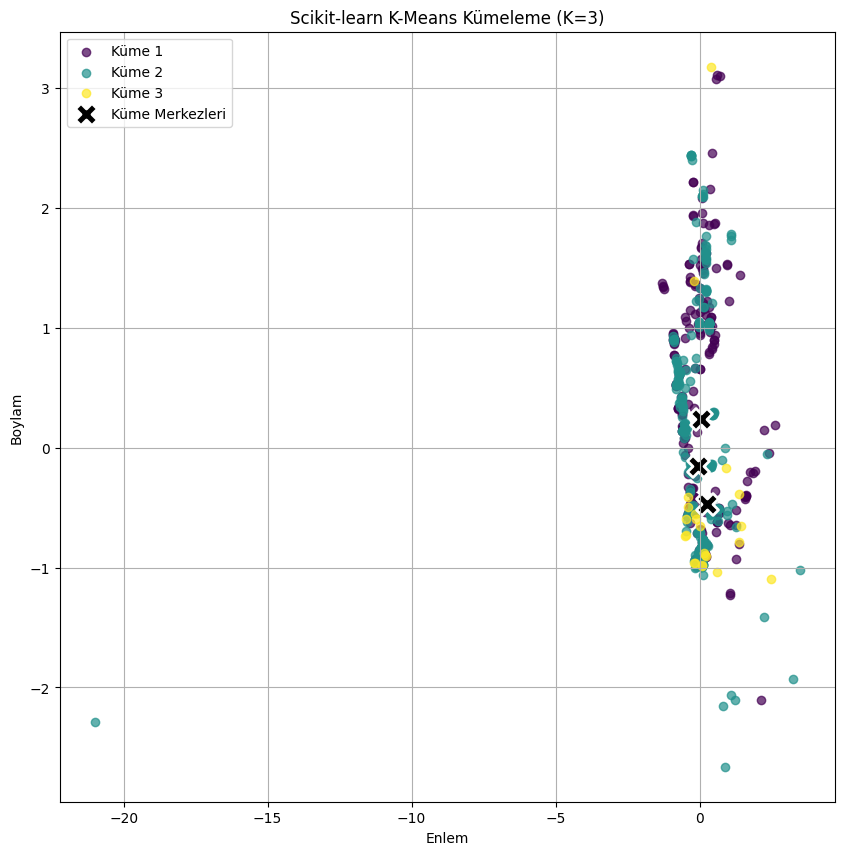

In [65]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np # Gerekirse rastgele veri için

# Örnek bir DataFrame oluşturalım (gerçek df'inizi kullanacaksınız)
# Bu kısım sadece hatayı tekrar etmek ve çözümü göstermek içindir.
# Siz doğrudan kendi 'df' DataFrame'inizi kullanmaya devam edin.

# K-Means Algoritması
k_value = 3
kmeans = KMeans(n_clusters=k_value, n_init='auto', random_state=42)
kmeans.fit(df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# --- Sonuçları Görselleştirme ---
plt.figure(figsize=(10, 10))

# Görselleştirme için hangi iki özelliği kullanacağınıza karar vermelisiniz.
# Genellikle, K-Means'i uyguladıktan sonra yüksek boyutlu veriyi görselleştirmek zordur.
# Bu örnekte ilk iki özelliği (veya sütunu) kullanacağız: df.columns[0] ve df.columns[1]
# Eğer belirli özellikleriniz varsa, onların isimlerini kullanabilirsiniz.
feature_x = df.columns[0] # Görselleştirme için 1. sütun
feature_y = df.columns[1] # Görselleştirme için 2. sütun

colors = plt.cm.get_cmap('viridis', k_value) # Dinamik renkler için

for i in range(k_value):
    # i. kümeye ait veri noktalarını seç
    cluster_points = df[labels == i]

    # DataFrame'den belirli sütunları seçerken iloc veya sütun isimlerini kullanın
    # Örneğin, ilk iki sütunu kullanıyorsanız:
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1],
                color=colors(i), label=f'Küme {i+1}', alpha=0.7) # alpha ekleyerek üst üste binmeleri azalt

# Küme merkezlerini (centroidleri) çizdir
# Centroids bir NumPy dizisi olduğu için doğrudan indekslenebilir.
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='X', s=250, color='black', edgecolor='white', linewidth=2,
            label='Küme Merkezleri')

plt.title(f'Scikit-learn K-Means Kümeleme (K={k_value})')
plt.xlabel(feature_x) # Sütun isimlerini etiketlere ekle
plt.ylabel(feature_y) # Sütun isimlerini etiketlere ekle
plt.legend()
plt.grid(True)
plt.show()

In [66]:
print(f"WCSS (inertia_): {kmeans.inertia_:.2f}")

WCSS (inertia_): 18683.38


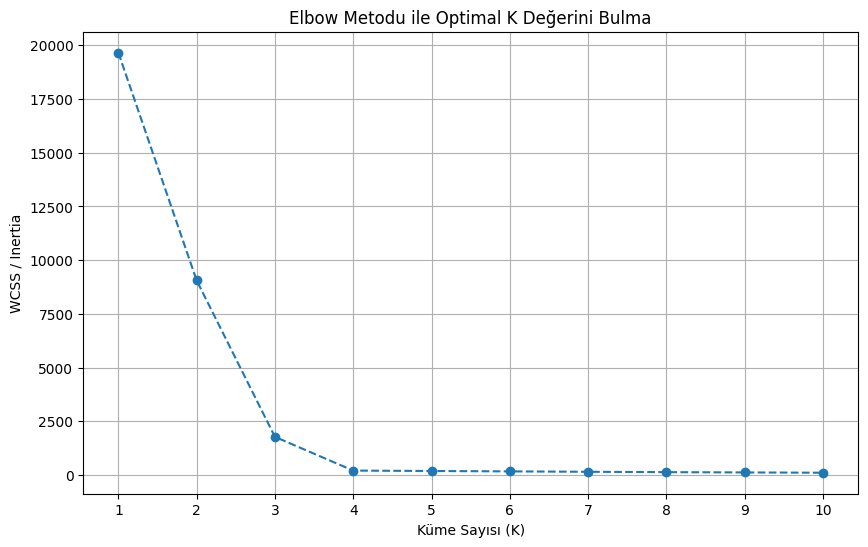

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Örnek veri oluşturma
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

wcss = [] # Within-Cluster Sum of Squares (WCSS) veya Inertia değerlerini saklamak için
# K'nın farklı değerlerini dene (örneğin 1'den 10'a kadar)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_, WCSS değerini verir

# Elbow Grafiğini Çizme
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Metodu ile Optimal K Değerini Bulma')
plt.xlabel('Küme Sayısı (K)')
plt.ylabel('WCSS / Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()